In [58]:
# Setting Up Dependencies
import requests
import pandas as pd
import matplotlib.pyplot as plt
import time
import gmaps
from config import api_key
from config import w_key
import numpy as np

gkey = api_key
gmaps.configure(api_key=gkey)

In [59]:
# Generating random Brewery IDs

brewery_id = []

for x in range(100):
    brewery_id.append(np.random.randint(0, 6000))

    brewery_id

unique_brewery = pd.DataFrame({"ID" : brewery_id})

unique_id = list(unique_brewery["ID"].unique())

print(f"Generated {len(unique_id)} unique Brewery IDs.")

Generated 100 unique Brewery IDs.


In [60]:
# Retrieving Raw Brewery Data
raw_brewery_data = []
start = time.time()
for x in range(len(unique_id)):
    try:
        url = "https://api.openbrewerydb.org/breweries/" + str(unique_id[x])
        response = requests.get(url).json()
        raw_brewery_data.append(response)
        print(f"({x+1}/{len(unique_id)}) Retrieved Brewery ID {unique_id[x]}...")

    except:
        print(f"({x+1}/{len(unique_id)}) Timeout for Brewery ID {unique_id[x]}... skipping")
        
stop = time.time()
time_elapsed = round((stop - start)/60,2)
print(f"\nRetrieved {len(unique_id)} breweries... Time elapsed: {time_elapsed} minutes.")

(1/100) Retrieved Brewery ID 2764...
(2/100) Retrieved Brewery ID 3689...
(3/100) Retrieved Brewery ID 321...
(4/100) Retrieved Brewery ID 4331...
(5/100) Retrieved Brewery ID 1399...
(6/100) Retrieved Brewery ID 1436...
(7/100) Retrieved Brewery ID 130...
(8/100) Retrieved Brewery ID 4621...
(9/100) Retrieved Brewery ID 1098...
(10/100) Retrieved Brewery ID 5348...
(11/100) Retrieved Brewery ID 549...
(12/100) Retrieved Brewery ID 2432...
(13/100) Retrieved Brewery ID 451...
(14/100) Retrieved Brewery ID 5951...
(15/100) Retrieved Brewery ID 4543...
(16/100) Retrieved Brewery ID 5018...
(17/100) Retrieved Brewery ID 1968...
(18/100) Retrieved Brewery ID 5086...
(19/100) Retrieved Brewery ID 1668...
(20/100) Retrieved Brewery ID 4541...
(21/100) Retrieved Brewery ID 5762...
(22/100) Retrieved Brewery ID 140...
(23/100) Retrieved Brewery ID 2201...
(24/100) Retrieved Brewery ID 175...
(25/100) Retrieved Brewery ID 987...
(26/100) Retrieved Brewery ID 5630...
(27/100) Retrieved Brewery I

In [61]:
# Creating DataFrame
brewery_df = pd.DataFrame(raw_brewery_data)
brewery_df.to_csv("raw_brewery_data.csv")
brewery_df.head()

,brewery_type,city,country,id,latitude,longitude,name,phone,postal_code,state,street,updated_at,website_url
0,micro,Polk City,United States,2764,41.7707988163265,-93.71392,Fenders Brewing Company,,50226-2297,Iowa,212 W Van Dorn St,2018-08-24T00:37:51.763Z,http://fendersbrewing.com
1,brewpub,Saint Clair Shores,United States,3689,42.4712223090048,-82.8887785856805,Shipwreck Brewing Company,5869442266,48080-1318,Michigan,24409 Jefferson Ave,2018-08-24T00:44:08.299Z,http://www.shipwreckbrewingcompany.com
2,brewpub,Tustin,United States,321,33.7419754,-117.823173,Archaic Craft Brewery At Centro,7142588817,92780-4408,California,140 E Main St,2018-08-23T23:24:32.002Z,
3,planning,Langdon,United States,4331,None,None,Monadnock Brewing Company LLC,6033136317,03602-8604,New Hampshire,,2018-08-11T21:38:20.311Z,http://www.monadnockbrewing.com
4,micro,Denver,United States,1399,39.758232,-105.04506,Hogshead Brewery,3038869655,80212-3015,Colorado,4460 W 29th Ave,2018-08-24T00:23:24.567Z,http://www.hogsheadbrewery.com


In [62]:
# Drop rows with "None" Lats/Lngs
brewery_df = brewery_df[brewery_df.latitude.str.contains("None") == False]
print(f"Dropped {len(unique_id) - len(brewery_df)} breweries from DataFrame which did not have coordinates.\nTotal Brewery count: {len(brewery_df)}") 
      

Dropped 40 breweries from DataFrame which did not have coordinates.
Total Brewery count: 60


In [63]:
brewery_loc = brewery_df[['latitude','longitude']].astype(float)
brewery_loc.head()

,latitude,longitude
0,41.770799,-93.713920
1,42.471222,-82.888779
2,33.741975,-117.823173
4,39.758232,-105.045060
5,39.562987,-104.894207


In [64]:
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(brewery_loc, dissipating=False, max_intensity=10, point_radius=1)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))

In [65]:
#Grabbing list of breweries from brewery_df
brewery_names = brewery_df['name'].tolist()
brewery_cities = brewery_df['city'].tolist()

In [66]:
#Grabbing weather info for cities
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={w_key}&units={units}&q="
temps=[]
x=0
for city in brewery_cities:
    x=x+1
    city_dic = {'name':'','temp':''}
    response = requests.get(query_url + city).json()
    
    if (response['cod'] != "404" and response['cod'] != "500"):      
        city_dic['name'] = response['name']
        city_dic['temp'] = response['main']['temp_max']
        temps.append(city_dic)
        print(f"({x}/{len(brewery_cities)}) {city} weather data found...")
    else:
        print(f"({x}/{len(brewery_cities)}) {city} not found... skipping")
    

(1/60) Polk City weather data found...
(2/60) Saint Clair Shores weather data found...
(3/60) Tustin weather data found...
(4/60) Denver weather data found...
(5/60) Lone Tree weather data found...
(6/60) Eureka weather data found...
(7/60) Cincinnati weather data found...
(8/60) Dunsmuir weather data found...
(9/60) Lomita weather data found...
(10/60) Portland weather data found...
(11/60) Durham weather data found...
(12/60) Franklin weather data found...
(13/60) South Windsor weather data found...
(14/60) Las Cruces weather data found...
(15/60) Atlanta weather data found...
(16/60) Cincinnati weather data found...
(17/60) Shakopee weather data found...
(18/60) Saint Cloud weather data found...
(19/60) Vista weather data found...
(20/60) Little Rock weather data found...
(21/60) Pearl River weather data found...
(22/60) Denver weather data found...
(23/60) Miami weather data found...
(24/60) San Jose weather data found...
(25/60) Howell weather data found...
(26/60) Springfield wea

In [67]:
#Turn weather info into dataframe
temp_df = pd.DataFrame(temps)
temp_df = temp_df.rename(columns = {'name':'city'})
temp_df

,city,temp
0,Polk City,73.40
1,Saint Clair Shores,86.00
2,Tustin,80.06
3,Denver,42.08
4,Lone Tree,77.00
5,Eureka,66.02
6,Cincinnati,84.02
7,Dunsmuir,66.92
8,Lomita,80.06
9,Portland,62.06


In [68]:
#Grabbing Brewery info
#base url for google places
base_url2 = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json"
ratings=[]
bad_names = []
zero_rating = []
x = 0
for name in brewery_names:
    x = x+1
    rat_dic = {'name': name,'rating':''}
    params = {'input': name, 'inputtype': 'textquery',
          'fields':'rating', 'key': api_key }
    response = requests.get(base_url2, params=params).json()
    
    try:
        if response['candidates'][0]['rating'] != 0.0:
            rat_dic['rating'] = response['candidates'][0]['rating']
            ratings.append(rat_dic)
            print(f"({x}/{len(brewery_names)}) Found rating for {name}...")
        else:
            print(f"({x}/{len(brewery_names)}) Zero rating for {name}...")      
            zero_rating.append(name)  
            
    except:
        #creating a list of names that don't return anything 
        print(f"({x}/{len(brewery_names)}) Could not find rating for {name}...") 
        bad_names.append(name)
        

(1/60) Found rating for Fenders Brewing Company...
(2/60) Found rating for Shipwreck Brewing Company...
(3/60) Could not find rating for Archaic Craft Brewery At Centro...
(4/60) Found rating for Hogshead Brewery...
(5/60) Found rating for Lone Tree Brewing Co...
(6/60) Found rating for The Booth Brewing Co....
(7/60) Found rating for Bad Tom Smith Brewing...
(8/60) Found rating for Dunsmuir Brewery Works...
(9/60) Could not find rating for Burnin Daylight Brewing Company...
(10/60) Found rating for StormBreaker Brewing St. Johns...
(11/60) Found rating for Barrel Culture Brewing And Blending...
(12/60) Could not find rating for Currahee Brewing Company...
(13/60) Found rating for Connecticut Valley Brewing Company...
(14/60) Found rating for Picacho Peak Brewing Company...
(15/60) Could not find rating for SweetWater Brewing Co...
(16/60) Found rating for Urban Artifact...
(17/60) Found rating for Shakopee Brewhall...
(18/60) Found rating for Beaver Island Brewing Company...
(19/60) F

In [69]:
ratings_df = pd.DataFrame(ratings)
ratings_df

,name,rating
0,Fenders Brewing Company,4.8
1,Shipwreck Brewing Company,4.6
2,Hogshead Brewery,4.7
3,Lone Tree Brewing Co,4.6
4,The Booth Brewing Co.,4.0
5,Bad Tom Smith Brewing,4.5
6,Dunsmuir Brewery Works,4.5
7,StormBreaker Brewing St. Johns,4.3
8,Barrel Culture Brewing And Blending,4.8
9,Connecticut Valley Brewing Company,4.6


In [70]:
#Merging Data Frames
brewery_and_temp = brewery_df.merge(temp_df, how = 'outer', on = 'city') 
# brewery_and_temp
brewery_and_temp1 = brewery_and_temp[['brewery_type','city','name','temp', 'state']]
brewery_temp_rating = brewery_and_temp1.merge(ratings_df, how = 'outer', on = 'name')
dataset_clean = brewery_temp_rating.dropna(how = 'any')
# dataset_clean
dataset_clean1 = dataset_clean.drop_duplicates('name')
dataset_clean2 = dataset_clean1.set_index('name')
dataset_clean2

,brewery_type,city,temp,state,rating
name,,,,,
Fenders Brewing Company,micro,Polk City,73.40,Iowa,4.8
Shipwreck Brewing Company,brewpub,Saint Clair Shores,86.00,Michigan,4.6
Hogshead Brewery,micro,Denver,42.08,Colorado,4.7
Black Sky Brewery,brewpub,Denver,42.08,Colorado,4.5
Lone Tree Brewing Co,micro,Lone Tree,77.00,Colorado,4.6
The Booth Brewing Co.,micro,Eureka,66.02,California,4.0
Bad Tom Smith Brewing,micro,Cincinnati,84.02,Ohio,4.5
Urban Artifact,micro,Cincinnati,84.02,Ohio,4.5
Dunsmuir Brewery Works,brewpub,Dunsmuir,66.92,California,4.5


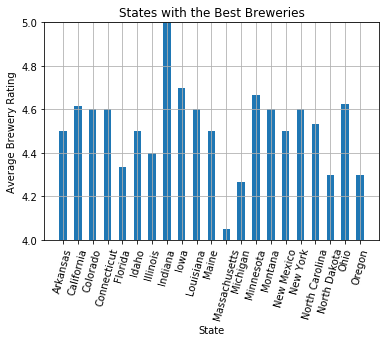

In [77]:
# Group DataFrame by State
group_by_state = dataset_clean2.groupby('state')

# Plot Average Rating By State
plt.bar(np.arange(0,len(group_by_state),1),height = group_by_state['rating'].mean(), tick_label = group_by_state['rating'].mean().index, width = 0.5)
plt.grid()
plt.title("States with the Best Breweries")
plt.xlabel("State")
plt.ylabel("Average Brewery Rating")
plt.xticks(rotation = 75)
plt.ylim(4,5)
plt.savefig("Average Brewery Rating vs State")
